<a id="NEtop"></a>

# Numerical Experiments
examples of optimizing system with different configurations, such as bounds, regularization functions, objective functions, etc.

the general flow or numerical experiments: 
* initialize and experiment object
* setup the specific configurations that you need for this particular experiement
* run()
* visualize the results, and discuss in text what's going on

## Index:

* [hand tuned evaluations](#hand_tuned_evaluations)
* [solution without constraints or penalties](#no_constraints_or_penalties)
* [BFGS](#BFGS_opt)




## import classes

In [1]:
#import all models, visualizers, and optimizers with a run line magic 
%run models.ipynb


models run as library
optimizers run as library


<a id="hand_tuned_evaluations"></a>
# Hand tuned evaluations [ &#x21ea;](#NEtop)

### hip knee robot (meghs's robot)

In [2]:
hkRobot = Exp()       #init robot
#hand tune robot configuration
hkRobot.r.xl = 0
hkRobot.r.yl = 0
hkRobot.r.xr = 0
hkRobot.r.yr = 0 

hkRobot.r.L1l = .4 
hkRobot.r.L2l = .1 
hkRobot.r.L3l = .288
hkRobot.r.L1r = .1
hkRobot.r.L2r = .4
hkRobot.r.θ3l = 0

hkRobot.r.e3  = 'down'

#configure xBest to be this
hkRobot.xBest = [hkRobot.r.get_x()]
hkRobot.initialize()
hkRobot.vis.display()


    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

In [3]:
propRobot = Exp()    #init robot

#hand tune robot bounds
propRobot.r.xl_max =  1.5
propRobot.r.yl_min = -1.5
propRobot.r.xr_max =  1.5
propRobot.r.yr_min = -1.5 
propRobot.r.L3l_min = 0.001

# #hand tune robot configuration
propRobot.r.xl =  .6
propRobot.r.yl = -.75
propRobot.r.xr =  .75
propRobot.r.yr = -.75

propRobot.r.L3l = 0
propRobot.r.θ3l = 0

propRobot.r.e3  = 'down'

#configure xBest to be this
propRobot.xBest = [propRobot.r.get_x()]
propRobot.initialize()
propRobot.vis.display("tb")


FigureWidget({
    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
              'ty…

In [56]:
#make a point 
hkRobot.scoreMode = 'inscribed'

### original proposal robot

<a id="no_constraints_or_penalties"></a>
# Solution without constraints or penalties [ &#x21ea;](#NEtop)



In [33]:
#run simulated anealing for a long time. 
exp1 = Exp()

#configure experiment
exp1.optimizer.nIter = 100000
exp1.initialize()

#run (took several hours)
#exp1.run()

#save
# cm = "100k SA optimization, segments are long but have a high match over a large segment of space"
# exp1.save(cm)

#load from storage
exp1.load('fes')

#display
exp1.vis.display()

    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

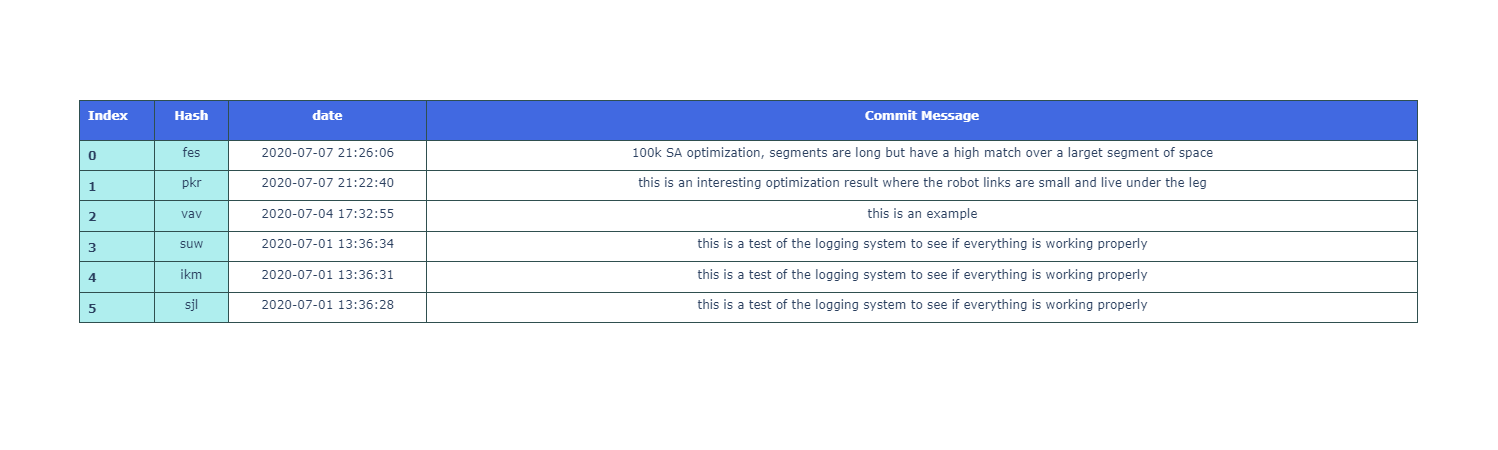

In [68]:
Exp.Log()

# load compact solution and visualize it

In [12]:
#run simulated anealing for a long time. 
exp2 = Exp()

#laod
a = exp2.load('pkr')

#display
exp2.vis.display()

    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

<a id="BFGS_opt"></a>
# BFGS optimization - optimize around hand tuned robot [ &#x21ea;](#NEtop)

In [153]:
# hkRobot = Exp()       #init robot

# #hand tune robot configuration
# hkRobot.r.xl = 0
# hkRobot.r.yl = 0
# hkRobot.r.xr = 0
# hkRobot.r.yr = 0 

# hkRobot.r.L1l = .4 
# hkRobot.r.L2l = .1 
# hkRobot.r.L3l = .288
# hkRobot.r.L1r = .1
# hkRobot.r.L2r = .4
# hkRobot.r.θ3l = 0

# hkRobot.r.e3  = 'down'

# #setup the optimizer and x0
# hkRobot.optimizer = BFGS()
# hkRobot.optimizer.x0 = [hkRobot.r.get_x()]

# #run optimization
# exp.run()

# #display optimization
# exp.vis.display("tb")


         Current function value: -42.260518
         Iterations: 6
         Function evaluations: 1524
         Gradient evaluations: 126


    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

In [149]:
# exp = Exp()

# #setup the optimizer
# exp.optimizer = BFGS()
# exp.optimizer.x0 = [exp.r.get_x()]

# #run optimization
# exp.run()

# #display optimization
# exp.vis.display("tb")

         Current function value: -42.260518
         Iterations: 6
         Function evaluations: 1524
         Gradient evaluations: 126


    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

# sobol sampling of the solution space

In [7]:
#generate the 100k sobol samples of the space, and archive them for later analysis
%run models.ipynb

#init experiment
exp = Exp()

#setup the optimizer
exp.optimizer = Sobol()
exp.optimizer.n = 100000

#run optimization (takes 30min)
#exp.run()

#save the optimziation
#exp.save("100k Sobol samples from which we will select a set of interesting designs")

#load the solutions into memmory
p = exp.load('qtx')

#move the solutions into the optimizer state
exp.optimizer.xs = p['simState']['opt']['xs']
exp.optimizer.fxs = p['simState']['opt']['fxs']

#select best solutions using selection method
exp.optimizer.histSelect()
exp.xBest = exp.optimizer.xBest #load into where visualizer will look

#view solutions
exp.vis.display()

models run as library
optimizers run as library


    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

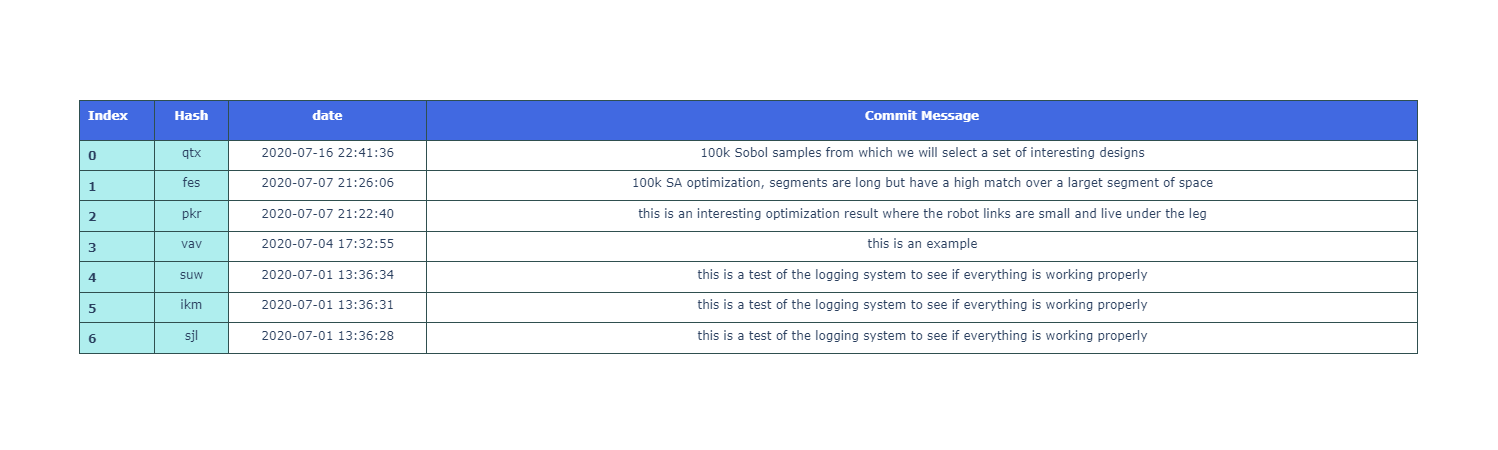

In [47]:
Exp.Log()

# Talking Points for 8/7/2020

# Explore the design implications of desired features

## <span style="color:blue"> 1) Two-plane use (sagittal [bike plane] and transverse [floor plane, if standing up]) </span>
* ### this means that the drive axes will have to rotate 90 it stand up use is desired.
* ### Support for being stepped on when operating in the transverse plane. Can have a “backer” to allow this.  

## <span style="color:blue">2) Workspace of 1 m (anteroposterior direction) and 0.75 m (axial leg direction, or lateral direction if tipped on its side) </span> 
* ### our default design meets these requirements, simply by having long segment lengths

## <span style="color:blue">3) the same machine is useful for right leg and left leg (in the sagittal plane)</span> 
* ### accomplishing this may be easiest using methods of symmetry. 
    * either rotate the robot 180 degrees (as shown in CAD model)
    * or mount the person on the other side of the robot (this could induce workspace issues due to collisions)
* ### difficulty of co-axial design? 

## <span style="color:blue"> 4) the machine may be used standing up in the sagittal plane, as well as seated, possibly with weight support</span>


## <span style="color:blue">5) force and velocity requirements</span>

* ### Strength to survive full-human-strength leg extension force. 
    * see singularity 
* ### Does not have to Control full-strength force or support it in all positions. Just has to survive!  
* ### Probably exploit a kinematic singularity (full robot link extension) for this capability.  
* ### Movement speed: 1.5 to 3.0 m/s will be adequate.  
* ### Strength of controlled forces: 11% of leg extension strength (300 N) 



# Singularity argument

In [1]:
hkRobot = Exp()       #init robot
#hand tune robot configuration
hkRobot.r.xl = 0
hkRobot.r.yl = 0
hkRobot.r.xr = 0
hkRobot.r.yr = 0 

hkRobot.r.L1l = .4 
hkRobot.r.L2l = .1 
hkRobot.r.L3l = .288
hkRobot.r.L1r = .1
hkRobot.r.L2r = .4
hkRobot.r.θ3l = 0

hkRobot.r.e3  = 'down'

#configure xBest to be this
hkRobot.xBest = [hkRobot.r.get_x()]
hkRobot.initialize()
hkRobot.vis.display()


NameError: name 'Exp' is not defined

# Experiments with inverse kinematic workspaces

## side by side

In [8]:
# R = Gen5barlinkage()

# #setup contour plot for condition number 
# #colorscale = [[0, 'green'],[.2,'royalblue'],[1, 'blue']]
# colorscale = [[0, 'green'],[1, 'blue']]
# X,Y,Z = R.condGrid()
# _fig = go.Figure(data = go.Contour(z=Z,x=X,y=Y,colorscale=colorscale,contours_coloring='heatmap'))
# Rfig = go.FigureWidget(_fig)
# #Rfig = go.FigureWidget()

# #configure layout of graph
# Rfig.update_xaxes(range=[-1,1])
# Rfig.update_yaxes(range=[-1,1])

# side = 800
# Rfig.update_layout(
#     autosize=False,
#     width=side + 100,
#     height=side,
#     legend=dict(x=.025, y=.975),
#     margin=dict(l=80, r=80, t=0, b=80))


# #add condition number annotation
# Rfig.add_annotation(
#         x=-.78,
#         y=.6,
#         xref="x",
#         yref="y",
#         text="",
#         font=dict(
#             family="Courier New, monospace",
#             size=16,
#             color="#ffffff"
#             ),
#         align="center",
#         ax=0,
#         ay=0,
#         bordercolor="#c7c7c7",
#         borderwidth=2,
#         borderpad=4,
#         bgcolor="#ff7f0e",
#         opacity=0.8
#         )

# #initialize all plots present in visualization
# Rfig.add_scatter(line=dict(color='gray'), name = "left")
# Rfig.add_scatter(line=dict(color='red'), name = "right")
# Rfig.add_scatter(mode='markers', marker=dict(size=12,color="black"), name = "End Effector")
# Rfig.add_scatter(line=dict(dash='dash',color='gray'), name = "RRR boundry")
# Rfig.add_scatter(line=dict(dash='dash',color='red'), name = "RR boundry")
# Rfig.add_scatter(fill='tozeroy',fillcolor='rgba(225, 0, 0, .2)',mode= 'none'  ,name="robot forceSpace")



# #setup UI
# layout=Layout(width='500px', height='20px')
# layout1=Layout(width='200px', height='30px')
# layout2=Layout(width='350px', height='30px')
# lmin = .1 ; lmax = .75; lval = .25
# rng = 1; step = .001
# N = 0


# #modes
# ef     = Dropdown(options=["up","down"],value="up",description='ef',layout=layout1)
# e3     = Dropdown(options=["up","down"],value="up",description='e3',layout=layout1)
# mode   = Dropdown(options=["None","boundry","cond"],value="None",description='Mode',layout=layout1)
# drive  = Dropdown(options=["xy","θ"],value="xy",description='drive',layout=layout1)
# fsView = Checkbox(value=False,description="fsView",dindent=False,layout=layout1)


# #params
# L1l = FloatSlider(min=lmin,max=lmax,step=step,value=lval,description='L1_l', layout=layout2)
# L2l = FloatSlider(min=lmin,max=lmax,step=step,value=lval,description='L2_l', layout=layout2)
# L3l = FloatSlider(min=0   ,max=lmax,step=step,value=lval,description='L3_l', layout=layout2)

# L1r = FloatSlider(min=lmin,max=lmax,step=step,value=lval,description='L1_r', layout=layout2)
# L2r = FloatSlider(min=lmin,max=lmax,step=step,value=lval,description='L2_r', layout=layout2)
# θ3l = FloatSlider(min=-np.pi,max=np.pi,step=step,value=lval,description='θ3_l', layout=layout2)

# xl = FloatSlider(min=-rng,max=rng,step=step,value=.0,description='x_l', layout=layout)
# xr = FloatSlider(min=-rng,max=rng,step=step,value=.5,description='x_r', layout=layout)

# yl = FloatSlider(min=-rng,max=rng,step=step,value=.0,description='y_l', layout=layout)
# yr = FloatSlider(min=-rng,max=rng,step=step,value=.0,description='y_r', layout=layout)

# #drivers
# θ1l = FloatSlider(min=-np.pi,max=np.pi,step=step,value=.0,description='θ1_l', layout=layout)
# xee = FloatSlider(min=-rng,max=rng,step=step,value=.5,description='xee', layout=layout)

# θ1r = FloatSlider(min=-np.pi,max=np.pi,step=step,value=.0,description='θ1_r', layout=layout)
# yee = FloatSlider(min=-rng,max=rng,step=step,value=.5,description='yee', layout=layout)

# #assemble UI
# row1 = widgets.HBox([ef,e3,mode,drive,fsView])
# row2 = widgets.HBox([L1l,L2l,L3l])
# row3 = widgets.HBox([L1r,L2r,θ3l])
# row4 = widgets.HBox([xl,xr])
# row5 = widgets.HBox([yl,yr])
# row6 = widgets.HBox([θ1l,xee])
# row7 = widgets.HBox([θ1r,yee])

# ui = widgets.VBox([row1,row2,row3,row4,row5,row6,row7])


# #setup update function
# wdict = {"ef":ef,"e3":e3,"mode":mode,"drive":drive,"fsView":fsView,
#          "L1l":L1l,"L2l":L2l,"L3l":L3l,
#          "L1r":L1r,"L2r":L2r,"θ3l":θ3l,
#          "xl":xl,"xr":xr,
#          "yl":yl,"yr":yr,
#          "_θ1l":θ1l,"_xee":xee,
#          "_θ1r":θ1r,"_yee":yee}


# def update(ef="up",e3="up",mode="None",drive="xy",fsView=False,
#            L1l=1,L2l=1,L3l=1,
#            L1r=1,L2r=1,θ3l=1,
#            xl=0,xr=1,
#            yl=0,yr=1,
#            _θ1l=1,_xee=1,    #use _ so we have access to the slider objects
#            _θ1r=1,_yee=1):

#     with Rfig.batch_update():

#         #update parameters
#         R.ef = ef ; R.e3 = e3
#         R.L1l = L1l ; R.L2l=L2l ; R.L3l = L3l
#         R.L1r = L1r ; R.L2r=L2r ; R.θ3l = θ3l
#         R.xl = xl ; R.xr = xr
#         R.yl = yl ; R.yr = yr

#         #calculate the robot's configuration
#         if drive == "xy":
#             _θ1l,_θ2l,_θ3l,_θ1r,_θ2r = R.IK5bl(_xee,_yee)
#             left,right = R.FKplot5bl(_θ1l,_θ2l,_θ3l,_θ1r,_θ2r)

#             #keep θ's up to date for solving numberical IK
#             if utils.noNans(_θ1l,_θ1r):
#                 global θ1l ; global θ1r
#                 θ1l.value = utils.ROC(_θ1l); θ1r.value = utils.ROC(_θ1r)

#         if drive == "θ":
#             _θ1l,_θ2l,_θ3l,_θ1r,_θ2r = R.θdrivenKinematics5bl(_θ1l,_θ1r)
#             left,right = R.FKplot5bl(_θ1l,_θ2l,_θ3l,_θ1r,_θ2r)

#         #draw the robot (if solution exists)
#         Rfig.data[1]['x'] = left[0]
#         Rfig.data[1]['y'] = left[1]

#         Rfig.data[2]['x'] = right[0]
#         Rfig.data[2]['y'] = right[1]  

#         #plot a dot at the end effector location
#         Rfig.data[3]['x'] = [_xee]
#         Rfig.data[3]['y'] = [_yee]

#         #annotate the condition number of the current configuration
#         invCond = 1/np.linalg.cond(R.J_invT(_xee,_yee))
#         Rfig.layout['annotations'][0]['text'] = "InvCond=" + str(round(invCond,3))

#         #draw the force space 
#         if fsView:
#             scale = .0005
#             xs,ys = R.FSplot(_xee,_yee,scale)
#             Rfig.data[6]['x'] = xs + _xee
#             Rfig.data[6]['y'] = ys + _yee

#         else:
#             Rfig.data[6]['x'] = []
#             Rfig.data[6]['y'] = []


#         #draw the reachable boundry
#         if mode == "boundry" or mode == "cond":
#             ls,rs = R.bounds()
#             Rfig.data[4]['x'] = ls[0]
#             Rfig.data[4]['y'] = ls[1]

#             Rfig.data[5]['x'] = rs[0]
#             Rfig.data[5]['y'] = rs[1]


#         #draw a contour plot of the reciprical condition number 
#         if mode == "cond":
#             X,Y,Z = R.condGrid()
#             Rfig.data[0]['x'] = X
#             Rfig.data[0]['y'] = Y
#             Rfig.data[0]['z'] = Z  

#         #clean up 
#         if mode == "None":
#             #clean up contour plot (this nukes R state)
#             X,Y,Z = R.condGrid(clean=True)
#             Rfig.data[0]['x'] = X
#             Rfig.data[0]['y'] = Y
#             Rfig.data[0]['z'] = Z

#             #clean up boundry
#             Rfig.data[4]['x'] = []
#             Rfig.data[4]['y'] = []

#             Rfig.data[5]['x'] = []
#             Rfig.data[5]['y'] = []

#         #reset R state properly
#         R.IK5bl(_xee,_yee)



# #display interactive figure
# out = widgets.interactive_output(update, wdict)
# display(ui)
# display(Rfig)


# ## setup the robot in the configuration in questions

# # # #modes
# ef.value = "up"
# e3.value = "down"

# #params
# L1l.value = .25
# L2l.value = .25
# L3l.value = .37

# L1r.value = .25
# L2r.value = .25
# θ3l.value = -.34

# xl.value =  .14
# xr.value = -.02

# yl.value = 0.0
# yr.value = 0.0




FigureWidget({
    'data': [{'colorscale': [[0, 'green'], [1, 'blue']],
              'contours': {'coloring':…

## top and bottom

Megh, run the cell below this, then change the "mode" to Cond to view a contour plot of the condition number. 

In [3]:
%run models.ipynb

R = Gen5barlinkage()

#setup contour plot for condition number 
#colorscale = [[0, 'green'],[.2,'royalblue'],[1, 'blue']]
colorscale = [[0, 'green'],[1, 'blue']]
X,Y,Z = R.condGrid()
_fig = go.Figure(data = go.Contour(z=Z,x=X,y=Y,colorscale=colorscale,contours_coloring='heatmap',contours=dict(start=0,end=1),))
Rfig = go.FigureWidget(_fig)
#Rfig = go.FigureWidget()

#configure layout of graph
Rfig.update_xaxes(range=[-1,1])
Rfig.update_yaxes(range=[-1,1])

side = 800
Rfig.update_layout(
    autosize=False,
    width=side + 100,
    height=side,
    legend=dict(x=.025, y=.975),
    margin=dict(l=80, r=80, t=0, b=80))


#add condition number annotation
Rfig.add_annotation(
        x=-.78,
        y=.6,
        xref="x",
        yref="y",
        text="",
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        ax=0,
        ay=0,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )

#initialize all plots present in visualization
Rfig.add_scatter(line=dict(color='gray'), name = "left")
Rfig.add_scatter(line=dict(color='red'), name = "right")
Rfig.add_scatter(mode='markers', marker=dict(size=12,color="black"), name = "End Effector")
Rfig.add_scatter(line=dict(dash='dash',color='gray'), name = "RRR boundry")
Rfig.add_scatter(line=dict(dash='dash',color='red'), name = "RR boundry")
Rfig.add_scatter(fill='tozeroy',fillcolor='rgba(225, 0, 0, .2)',mode= 'none'  ,name="robot forceSpace")



#setup UI
layout=Layout(width='500px', height='20px')
layout1=Layout(width='200px', height='30px')
layout2=Layout(width='350px', height='30px')
lmin = .1 ; lmax = .75; lval = .25
rng = 1; step = .001
N = 0


#modes
ef     = Dropdown(options=["up","down"],value="up",description='ef',layout=layout1)
e3     = Dropdown(options=["up","down"],value="up",description='e3',layout=layout1)
mode   = Dropdown(options=["None","boundry","cond"],value="None",description='Mode',layout=layout1)
drive  = Dropdown(options=["xy","θ"],value="xy",description='drive',layout=layout1)
fsView = Checkbox(value=False,description="fsView",dindent=False,layout=layout1)


#params
L1l = FloatSlider(min=lmin,max=lmax,step=step,value=lval,description='L1_l', layout=layout2)
L2l = FloatSlider(min=lmin,max=lmax,step=step,value=lval,description='L2_l', layout=layout2)
L3l = FloatSlider(min=0   ,max=lmax,step=step,value=lval,description='L3_l', layout=layout2)

L1r = FloatSlider(min=lmin,max=lmax,step=step,value=lval,description='L1_r', layout=layout2)
L2r = FloatSlider(min=lmin,max=lmax,step=step,value=lval,description='L2_r', layout=layout2)
θ3l = FloatSlider(min=-np.pi,max=np.pi,step=step,value=lval,description='θ3_l', layout=layout2)

xl = FloatSlider(min=-rng,max=rng,step=step,value=.0,description='x_l', layout=layout)
xr = FloatSlider(min=-rng,max=rng,step=step,value=.5,description='x_r', layout=layout)

yl = FloatSlider(min=-rng,max=rng,step=step,value=.0,description='y_l', layout=layout)
yr = FloatSlider(min=-rng,max=rng,step=step,value=.0,description='y_r', layout=layout)

#drivers
θ1l = FloatSlider(min=-np.pi,max=np.pi,step=step,value=.0,description='θ1_l', layout=layout)
xee = FloatSlider(min=-rng,max=rng,step=step,value=.5,description='xee', layout=layout)

θ1r = FloatSlider(min=-np.pi,max=np.pi,step=step,value=.0,description='θ1_r', layout=layout)
yee = FloatSlider(min=-rng,max=rng,step=step,value=.5,description='yee', layout=layout)

#assemble UI
row1 = widgets.HBox([ef,e3,mode,drive,fsView])
row2 = widgets.HBox([L1l,L2l,L3l])
row3 = widgets.HBox([L1r,L2r,θ3l])
row4 = widgets.HBox([xl,xr])
row5 = widgets.HBox([yl,yr])
row6 = widgets.HBox([θ1l,xee])
row7 = widgets.HBox([θ1r,yee])

ui = widgets.VBox([row1,row2,row3,row4,row5,row6,row7])


#setup update function
wdict = {"ef":ef,"e3":e3,"mode":mode,"drive":drive,"fsView":fsView,
         "L1l":L1l,"L2l":L2l,"L3l":L3l,
         "L1r":L1r,"L2r":L2r,"θ3l":θ3l,
         "xl":xl,"xr":xr,
         "yl":yl,"yr":yr,
         "_θ1l":θ1l,"_xee":xee,
         "_θ1r":θ1r,"_yee":yee}


def update(ef="up",e3="up",mode="None",drive="xy",fsView=False,
           L1l=1,L2l=1,L3l=1,
           L1r=1,L2r=1,θ3l=1,
           xl=0,xr=1,
           yl=0,yr=1,
           _θ1l=1,_xee=1,    #use _ so we have access to the slider objects
           _θ1r=1,_yee=1):

    with Rfig.batch_update():

        #update parameters
        R.ef = ef ; R.e3 = e3
        R.L1l = L1l ; R.L2l=L2l ; R.L3l = L3l
        R.L1r = L1r ; R.L2r=L2r ; R.θ3l = θ3l
        R.xl = xl ; R.xr = xr
        R.yl = yl ; R.yr = yr

        #calculate the robot's configuration
        if drive == "xy":
            _θ1l,_θ2l,_θ3l,_θ1r,_θ2r = R.IK5bl(_xee,_yee)
            left,right = R.FKplot5bl(_θ1l,_θ2l,_θ3l,_θ1r,_θ2r)

            #keep θ's up to date for solving numberical IK
            if utils.noNans(_θ1l,_θ1r):
                global θ1l ; global θ1r
                θ1l.value = utils.ROC(_θ1l); θ1r.value = utils.ROC(_θ1r)

        if drive == "θ":
            _θ1l,_θ2l,_θ3l,_θ1r,_θ2r = R.θdrivenKinematics5bl(_θ1l,_θ1r)
            left,right = R.FKplot5bl(_θ1l,_θ2l,_θ3l,_θ1r,_θ2r)

        #draw the robot (if solution exists)
        Rfig.data[1]['x'] = left[0]
        Rfig.data[1]['y'] = left[1]

        Rfig.data[2]['x'] = right[0]
        Rfig.data[2]['y'] = right[1]  

        #plot a dot at the end effector location
        Rfig.data[3]['x'] = [_xee]
        Rfig.data[3]['y'] = [_yee]

        #annotate the condition number of the current configuration
        invCond = 1/np.linalg.cond(R.J_invT(_xee,_yee))
        Rfig.layout['annotations'][0]['text'] = "InvCond=" + str(round(invCond,3))

        #draw the force space 
        if fsView:
            scale = .0005
            xs,ys = R.FSplot(_xee,_yee,scale)
            Rfig.data[6]['x'] = xs + _xee
            Rfig.data[6]['y'] = ys + _yee

        else:
            Rfig.data[6]['x'] = []
            Rfig.data[6]['y'] = []


        #draw the reachable boundry
        if mode == "boundry" or mode == "cond":
            ls,rs = R.bounds()
            Rfig.data[4]['x'] = ls[0]
            Rfig.data[4]['y'] = ls[1]

            Rfig.data[5]['x'] = rs[0]
            Rfig.data[5]['y'] = rs[1]


        #draw a contour plot of the reciprical condition number 
        if mode == "cond":
            X,Y,Z = R.condGrid()
            Rfig.data[0]['x'] = X
            Rfig.data[0]['y'] = Y
            Rfig.data[0]['z'] = Z  

        #clean up 
        if mode == "None":
            #clean up contour plot (this nukes R state)
            X,Y,Z = R.condGrid(clean=True)
            Rfig.data[0]['x'] = X
            Rfig.data[0]['y'] = Y
            Rfig.data[0]['z'] = Z

            #clean up boundry
            Rfig.data[4]['x'] = []
            Rfig.data[4]['y'] = []

            Rfig.data[5]['x'] = []
            Rfig.data[5]['y'] = []

        #reset R state properly
        R.IK5bl(_xee,_yee)



#display interactive figure
out = widgets.interactive_output(update, wdict)
display(ui)
display(Rfig)


## setup the robot in the configuration in questions


# #design 1
# ef.value = "down"
# e3.value = "up"

# #params
# L1l.value = .45
# L2l.value = .29
# L3l.value = .38

# L1r.value = .26
# L2r.value = .39
# θ3l.value = 0

# xl.value =  0
# xr.value =  0

# yl.value = -.05
# yr.value = -.23


#design 2
#modes
ef.value = "up"
e3.value = "down"

# #params
L1l.value = .45
L2l.value = .28
L3l.value = .38

L1r.value = .26
L2r.value = .40
θ3l.value =  0

xl.value = 0
xr.value = 0

yl.value = -.23
yr.value = -.07



# #drivers
# xee.value = FloatSlider(min=-rng,max=rng,step=step,value=.5,description='xee', layout=layout)
# yee.value = FloatSlider(min=-rng,max=rng,step=step,value=.5,description='yee', layout=layout)

models run as library
optimizers run as library


FigureWidget({
    'data': [{'colorscale': [[0, 'green'], [1, 'blue']],
              'contours': {'coloring':…

fundemental tradeoffs: 
* overall workspace is set by the size of the 4 proximal links. the last link merely extends area outwards and away from the centers, it doesn't appear to add area to the workspace, and it also serves to stretch the force polytope. 
* there are 4 domains within the pantograph, when the ground points are placed colinearly. 



# Sizing Actuators
* size the actuators based on 30% of the human performance criteria.
* weight of the leg shouldn't be factored into the analysis, because the force capacity of the robot is symmetrical, and the human is not, so if the robot is meeting the requirements of the 

In [31]:
hkRobot = Exp()       #init robot
#hand tune robot configuration
hkRobot.r.xl = 0
hkRobot.r.yl = -.23
hkRobot.r.xr = 0
hkRobot.r.yr = -.07 

hkRobot.r.L1l = .45 
hkRobot.r.L2l = .28 
hkRobot.r.L3l = .38
hkRobot.r.L1r = .26
hkRobot.r.L2r = .40
hkRobot.r.θ3l = 0

hkRobot.r.ef = "up"
hkRobot.r.e3  = "down"


#configure xBest to be this
hkRobot.xBest = [hkRobot.r.get_x()]
hkRobot.initialize()
hkRobot.vis.display()


#change score mode
hkRobot.scoreMode = "inscribed"

    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …